In [3]:
import numpy as np
import pandas as pd 
import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

In [4]:
df = pd.read_csv('data/devices1.csv')

In [5]:
batt0 = df.loc[df["battery_id"]==0]

In [6]:
columns_todrop = ['current_in','current_out','panel_voltage','state_of_charge_percent','usb_current','voltage']
batt0 = batt0.drop(columns=columns_todrop)

In [7]:
batt0['year'] = pd.DatetimeIndex(batt0['timestamp']).year
batt0['month'] = pd.DatetimeIndex(batt0['timestamp']).month
batt0['date'] = pd.DatetimeIndex(batt0['timestamp']).day
batt0.head()

,battery_voltage,current,temperature,timestamp,battery_id,year,month,date
0,7.090,-2.542,NaN,2021-03-02 06:33:24,0,2021,3,2
1,7.100,-2.548,NaN,2021-03-02 06:35:24,0,2021,3,2
2,7.095,-2.472,NaN,2021-03-02 06:37:24,0,2021,3,2
3,7.070,-2.232,NaN,2021-03-02 06:39:24,0,2021,3,2
4,7.075,-2.276,28.287938,2021-03-02 06:41:24,0,2021,3,2


In [8]:
#justdates = pd.to_datetime(batt0.loc[:,'timestamp']).dt.date
#justdates = justdates.dt.date
#justdates.unique()

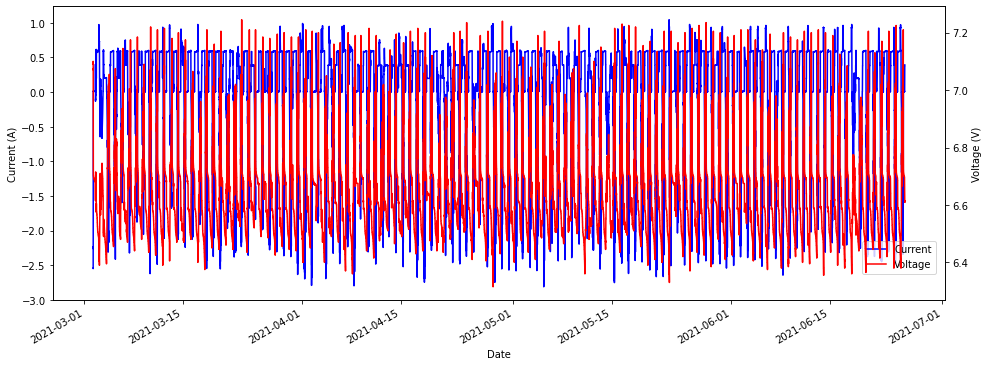

In [9]:
# Basic plot of the data
plt.rcParams['figure.figsize'] = [16, 6]
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

#start_pidx = 0 
#end_pidx = 100 

#dates = matplotlib.dates.date2num(batt0.loc[start_pidx:end_pidx, "timestamp"])
#current = batt0.loc[start_pidx:end_pidx, "current"]
#voltage = batt0.loc[start_pidx:end_pidx, "battery_voltage"]

dates = matplotlib.dates.date2num(batt0.loc[:,"timestamp"])
current = batt0.loc[:,"current"]
voltage = batt0.loc[:,"battery_voltage"]

fig, host = plt.subplots()
par1 = host.twinx()

p1, = host.plot(dates, current, 'b', label='Current')
p2, = par1.plot(dates, voltage, 'r', label='Voltage')

host.set_ylabel('Current (A)')
par1.set_ylabel('Voltage (V)')
host.set_xlabel('Date')

host.xaxis.set_major_locator(xtick_locator)
host.xaxis.set_major_formatter(xtick_formatter)
fig.autofmt_xdate()

lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines], loc=1, bbox_to_anchor=(0.995,0.22))

In [10]:
years = pd.DatetimeIndex(batt0.head(1).loc[:,'timestamp']).year
years

Int64Index([2021], dtype='int64', name='timestamp')

# Daily Usage Plot

In [11]:
#datebatt = batt0.loc[batt0.loc[batt0["year"]==2021] and batt0.loc[batt0["month"]==3] and batt0.loc[batt0["date"]==3]]
#datebatt = batt0.loc[(batt0.year == 2021) & (batt0.month == 3) & (batt0.date == 2)]

In [12]:
datebatt = batt0.loc[(batt0.year == 2021) & (batt0.month == 3) & (batt0.date == 3)]

C:\Users\nishank\AppData\Local\Temp\ipykernel_21580\558362815.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datebatt["power"] = datebatt["battery_voltage"] * datebatt["current"]


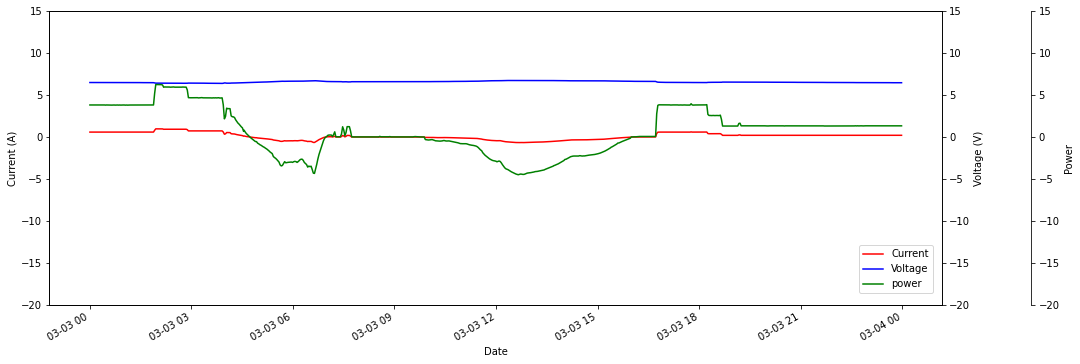

In [24]:
# Basic plot of the data
plt.rcParams['figure.figsize'] = [16, 6]
xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)


dates = matplotlib.dates.date2num(datebatt.loc[:,"timestamp"])
current = datebatt.loc[:,"current"]
voltage = datebatt.loc[:,"battery_voltage"]

datebatt["power"] = datebatt["battery_voltage"] * datebatt["current"]
power = datebatt.loc[:,"power"]

fig, host = plt.subplots()
par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))

p1, = host.plot(dates, current, 'r', label='Current')
p2, = par1.plot(dates, voltage, 'b', label='Voltage')
p3, = par2.plot(dates, power, 'green', label='power')

host.set_ylabel('Current (A)')
host.set_ylim([-20, 15])
par1.set_ylabel('Voltage (V)')
par1.set_ylim([-20, 15])
par2.set_ylabel("Power")
par2.set_ylim([-20, 15])
host.set_xlabel('Date')

host.xaxis.set_major_locator(xtick_locator)
host.xaxis.set_major_formatter(xtick_formatter)
fig.autofmt_xdate()

lines = [p1, p2,p3]
host.legend(lines, [l.get_label() for l in lines], loc=1, bbox_to_anchor=(0.995,0.22))

In [32]:
powerconsumed = power[power>0].count()
powerconsumed

476

In [33]:
powerinput = power[power<0].count()
powerinput

253